In [379]:
import tensorflow as tf 

#### LOAD "MNIST DATA SET" that contains 70000 samples out of which 60000 will be used as training samples and 10000 as testing samples tensorflow already contains MNIST Data set 

In [381]:
mnist = tf.keras.datasets.mnist

#### Dividing the dataset to training and testing

In [383]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [385]:
x_train.shape

(60000, 28, 28)

In [387]:
import matplotlib.pyplot as plt 

#### Checking values of each pixel before normalization

In [389]:
print(x_train[20])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

#### As images are in gray level not coloured (RBG) & Nomalizing the data (pre-processing step)

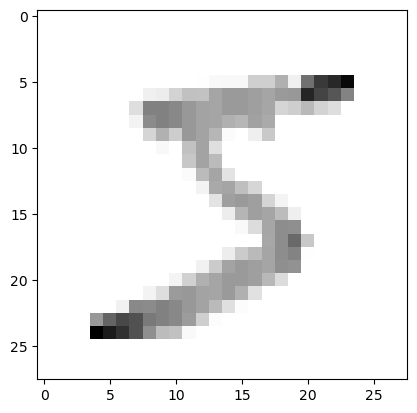

In [391]:
x_train = tf.keras.utils.normalize (x_train, axis =1)
x_test = tf.keras.utils.normalize (x_test, axis =1)
plt.imshow(x_train[0],  cmap = plt.cm.binary)

In [301]:
print(x_train[0]) #you can see the values are normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [393]:
print (y_train[0]) #just checking labels

5


#### Resizing images to make it suited for Convolution

In [395]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE, IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE, IMG_SIZE,1)
print("Training Sample dimensions",x_trainr.shape)
print("Testing Sample dimensions",x_testr.shape)

Training Sample dimensions (60000, 28, 28, 1)
Testing Sample dimensions (10000, 28, 28, 1)


#### Starting Deep Learning Architecture

In [397]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [399]:
### Creating NN
model = Sequential()

#### First Convolution Layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### 2nd Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### 3rd Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Fully Connected Layer 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#### Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#### Last Fully Connected Layer 2
model.add(Dense(10))
model.add(Activation("softmax"))
                     

In [401]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [403]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [405]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [407]:
model.fit(x_trainr,y_train,epochs=5, validation_split =0.3) ##Training my model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.7612 - loss: 0.7203 - val_accuracy: 0.9592 - val_loss: 0.1322
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.9655 - loss: 0.1111 - val_accuracy: 0.9724 - val_loss: 0.0909
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.9769 - loss: 0.0776 - val_accuracy: 0.9748 - val_loss: 0.0822
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.9820 - loss: 0.0571 - val_accuracy: 0.9781 - val_loss: 0.0736
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.9851 - loss: 0.0481 - val_accuracy: 0.9771 - val_loss: 0.0775


Validationa acc = 97% and Test validation acc = 98% so we can move forward

In [409]:
#### Evaluating on testing data set MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9742 - loss: 0.0895
Test loss on 10,000 test samples 0.07540854811668396
Validation Accuracy on 10,000 test samples 0.9789999723434448


In [411]:
import cv2

In [413]:
img = cv2.imread('C:/Users/ghana/Downloads/test1.png')

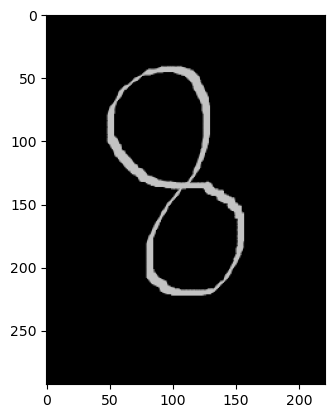

In [415]:
plt.imshow(img)

In [417]:
img.shape

(293, 221, 3)

In [419]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [421]:
resized.shape

(28, 28)

In [423]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [425]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [427]:
newimg.shape

(1, 28, 28, 1)

In [429]:
prediction = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


In [431]:
print (np.argmax(prediction))

8


In [433]:
img1 = cv2.imread('C:/Users/ghana/Downloads/test2.png')

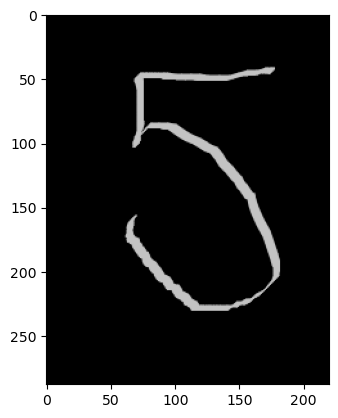

In [435]:
plt.imshow(img1)

In [437]:
img1.shape

(288, 220, 3)

In [439]:
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [441]:
resized.shape

(28, 28)

In [443]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [445]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [447]:
newimg.shape

(1, 28, 28, 1)

In [449]:
prediction = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [451]:
print (np.argmax(prediction))

5
